In [57]:
import pandas as pd
from sodapy import Socrata
import matplotlib.pyplot as plt
#import geopandas as gpd


client = Socrata("analisi.transparenciacatalunya.cat", None)

results = client.get("rmgc-ncpb", limit=17000)

# Convert to pandas DataFrame
df = pd.DataFrame.from_records(results)
df.head()

,any,zona,dat,via,pk,nommun,nomcom,nomdem,f_morts,f_ferits_greus,...,d_superficie,d_tipus_via,d_titularitat_via,d_tracat_altimetric,d_vent,grupdialab,hor,gruphor,tipacc,tipdia
0,2010,Zona urbana,2010-01-25T23:33:00.000,SE,999999,CANOVES I SAMALUS,Valles Oriental,Barcelona,0,1,...,Sec i net,Via urbana( inclou carrer i carrer residencial),NA,NA,"Calma, vent molt suau",Feiners,2333,Nit,Col.lisió de vehicles en marxa,dill-dij
1,2010,Carretera,2010-10-31T01:00:00.000,N-240,999,LLEIDA,Segria,Lleida,0,1,...,Sec i net,Carretera convencional,Estatal,Pla,"Calma, vent molt suau",CapDeSetmana,1,Nit,Sortida de la calcada sense especificar,dg
2,2010,Carretera,2010-05-17T15:27:00.000,N-II,7087,FORNELLS DE LA SELVA,Girones,Girona,1,0,...,Sec i net,Carretera convencional,Estatal,Rampa o pendent,"Calma, vent molt suau",Feiners,1527,Tarda,Col.lisió de vehicles en marxa,dill-dij
3,2010,Zona urbana,2010-08-21T22:30:00.000,SE,999999,BARCELONA,Barcelones,Barcelona,0,2,...,Sec i net,Via urbana( inclou carrer i carrer residencial),NA,NA,"Calma, vent molt suau",CapDeSetmana,223,Nit,Col.lisió de vehicles en marxa,dis
4,2010,Zona urbana,2010-05-07T17:45:00.000,SE,999999,BADALONA,Barcelones,Barcelona,0,1,...,Sec i net,Via urbana( inclou carrer i carrer residencial),NA,NA,"Calma, vent molt suau",CapDeSetmana,1745,Tarda,Bolcada a la calcada,div


In [69]:
df['dat'] = df['dat'].str.replace('T',' -')
df[['data','hora']] = df["dat"].str.split(" ", 1, expand=True)
df["hora"] = df["hora"].str.strip("-")
df.head()

,any,zona,dat,via,pk,nommun,nomcom,nomdem,f_morts,f_ferits_greus,...,d_titularitat_via,d_tracat_altimetric,d_vent,grupdialab,hor,gruphor,tipacc,tipdia,data,hora
0,2010,Zona urbana,2010-01-25 -23:33:00.000,SE,999999,CANOVES I SAMALUS,Valles Oriental,Barcelona,0,1,...,NA,NA,"Calma, vent molt suau",Feiners,2333,Nit,Col.lisió de vehicles en marxa,dill-dij,2010-01-25,23:33:00.000
1,2010,Carretera,2010-10-31 -01:00:00.000,N-240,999,LLEIDA,Segria,Lleida,0,1,...,Estatal,Pla,"Calma, vent molt suau",CapDeSetmana,1,Nit,Sortida de la calcada sense especificar,dg,2010-10-31,01:00:00.000
2,2010,Carretera,2010-05-17 -15:27:00.000,N-II,7087,FORNELLS DE LA SELVA,Girones,Girona,1,0,...,Estatal,Rampa o pendent,"Calma, vent molt suau",Feiners,1527,Tarda,Col.lisió de vehicles en marxa,dill-dij,2010-05-17,15:27:00.000
3,2010,Zona urbana,2010-08-21 -22:30:00.000,SE,999999,BARCELONA,Barcelones,Barcelona,0,2,...,NA,NA,"Calma, vent molt suau",CapDeSetmana,223,Nit,Col.lisió de vehicles en marxa,dis,2010-08-21,22:30:00.000
4,2010,Zona urbana,2010-05-07 -17:45:00.000,SE,999999,BADALONA,Barcelones,Barcelona,0,1,...,NA,NA,"Calma, vent molt suau",CapDeSetmana,1745,Tarda,Bolcada a la calcada,div,2010-05-07,17:45:00.000


In [70]:
quesito=df[['nommun','data']]
quesito

,nommun,data
0,CANOVES I SAMALUS,2010-01-25
1,LLEIDA,2010-10-31
2,FORNELLS DE LA SELVA,2010-05-17
3,BARCELONA,2010-08-21
4,BADALONA,2010-05-07
...,...,...
16769,BARCELONA,2018-11-20
16770,CASTELLVI DE ROSANES,2018-12-03
16771,"VENDRELL, EL",2018-09-30
16772,VIVER I SERRATEIX,2018-04-04


In [71]:
quesito.set_index('nommun', inplace = True)
quesito

,data
nommun,
CANOVES I SAMALUS,2010-01-25
LLEIDA,2010-10-31
FORNELLS DE LA SELVA,2010-05-17
BARCELONA,2010-08-21
BADALONA,2010-05-07
...,...
BARCELONA,2018-11-20
CASTELLVI DE ROSANES,2018-12-03
"VENDRELL, EL",2018-09-30


In [78]:
quesito_b["data"] = quesito_b["data"].astype("datetime64")


array([[<AxesSubplot:title={'center':'data'}>]], dtype=object)

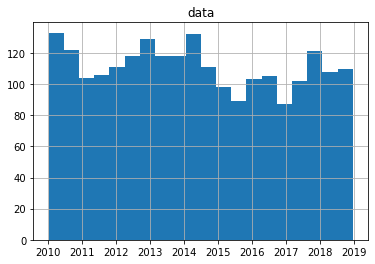

In [95]:
#quesito_b['d_subtipus_accident'].value_counts().plot.pie()
quesito_b.hist(column='data', bins=20)

In [106]:
f_ll = df[['f_ferits_lleus','data']]

f_ll=f_ll.drop(index=f_ll[f_ll['f_ferits_lleus']== '0'].index)

f_ll

,f_ferits_lleus,data
1,3,2010-10-31
2,2,2010-05-17
3,7,2010-08-21
5,1,2010-08-16
7,1,2010-10-23
...,...,...
16748,1,2018-10-23
16749,1,2018-04-03
16756,1,2018-01-26
16757,1,2018-07-28


In [131]:
f_g = df[['f_ferits_greus','data']]

f_g=f_g.drop(index=f_g[f_g['f_ferits_greus']== '0'].index)

f_g

,f_ferits_greus,data
0,1,2010-01-25
1,1,2010-10-31
3,2,2010-08-21
4,1,2010-05-07
5,1,2010-08-16
...,...,...
16769,1,2018-11-20
16770,1,2018-12-03
16771,1,2018-09-30
16772,1,2018-04-04


In [126]:
f_m = df[['f_morts','data']]

f_m=f_m.drop(index=f_m[f_m['f_morts']=='0'].index)

f_m

,f_morts,data
2,1,2010-05-17
7,1,2010-10-23
18,1,2010-07-02
24,1,2010-02-08
27,1,2010-06-23
...,...,...
16732,1,2018-12-16
16737,1,2018-03-27
16752,1,2018-05-12
16762,1,2018-12-01


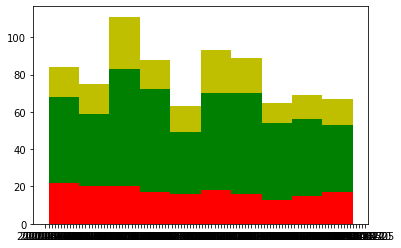

In [117]:
plt.hist([f_m['data'],f_g['data'],f_ll['data']],bins=10, range=(1,100), stacked=True, color = ['r','g','y'])
plt.show()

,f_ferits_lleus,data
1,3,2010-10-31
2,2,2010-05-17
3,7,2010-08-21
5,1,2010-08-16
7,1,2010-10-23
...,...,...
16748,1,2018-10-23
16749,1,2018-04-03
16756,1,2018-01-26
16757,1,2018-07-28
